<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [4]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [5]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [9]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [10]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [11]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<AxesSubplot:ylabel='MEDV'>

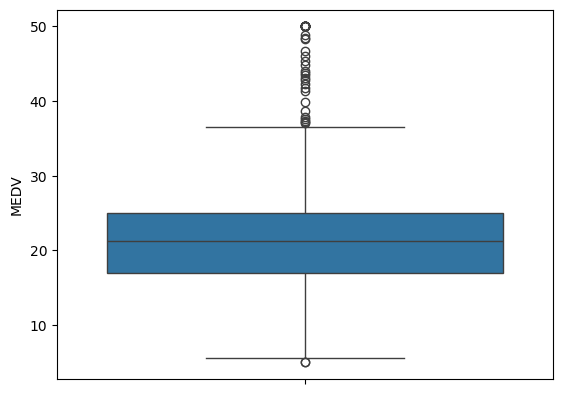

In [12]:

#DESCRIPTIVE STATISTICS 
#Boxplot MEDV 
sns.boxplot(y="MEDV", data=boston_df)

<AxesSubplot:>

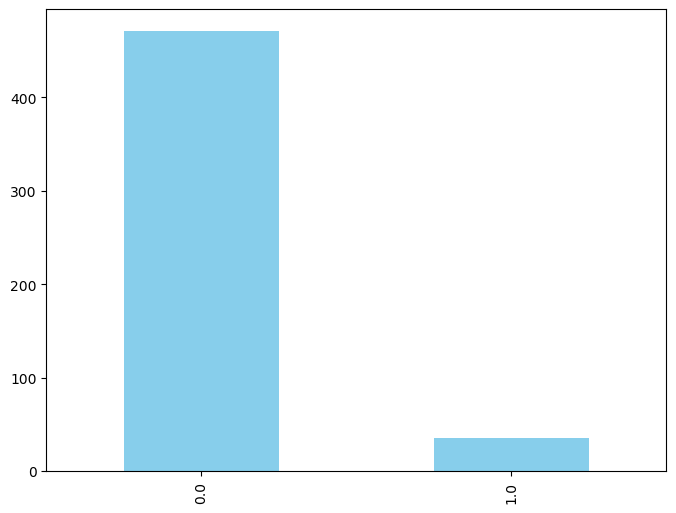

In [13]:

#Barplpot charles river 
plt.figure(figsize=(8, 6))
boston_df['CHAS'].value_counts().plot(kind='bar', color='skyblue')

<ipython-input-14-3af1c1cd1629>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=boston_df, x='AGE_Group', y='MEDV', palette='pastel')


<AxesSubplot:xlabel='AGE_Group', ylabel='MEDV'>

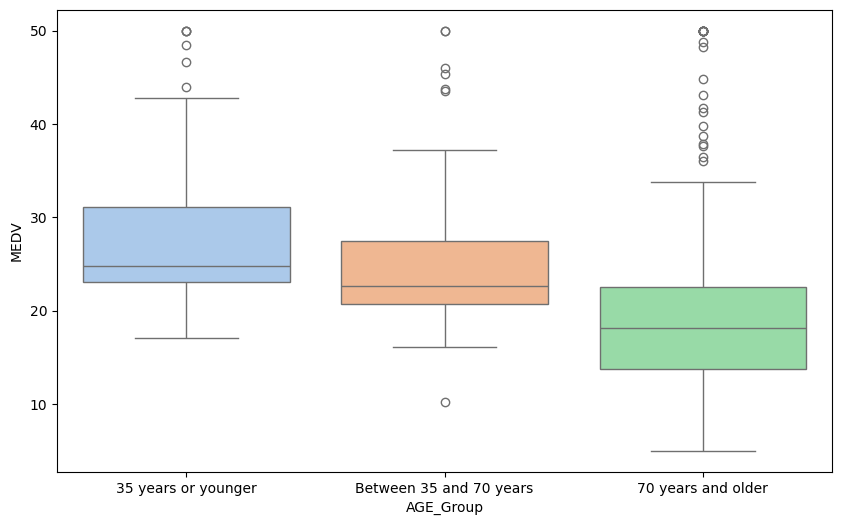

In [14]:
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years or younger', 'Between 35 and 70 years', '70 years and older'])

#Boxplot para MEDV según la edad
plt.figure(figsize=(10, 6))
sns.boxplot(data=boston_df, x='AGE_Group', y='MEDV', palette='pastel')

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

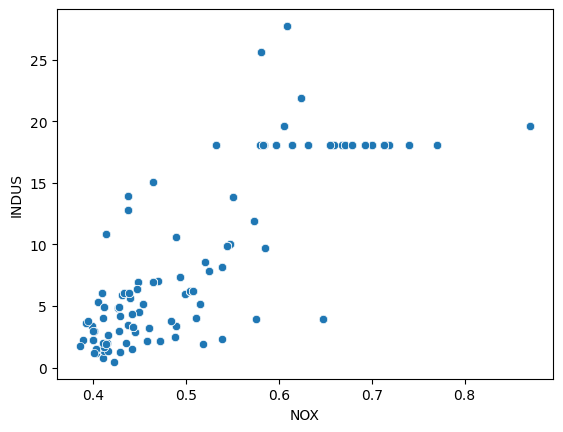

In [15]:
#Scatterplot 
sns.scatterplot(data=boston_df, x="NOX", y="INDUS")


<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

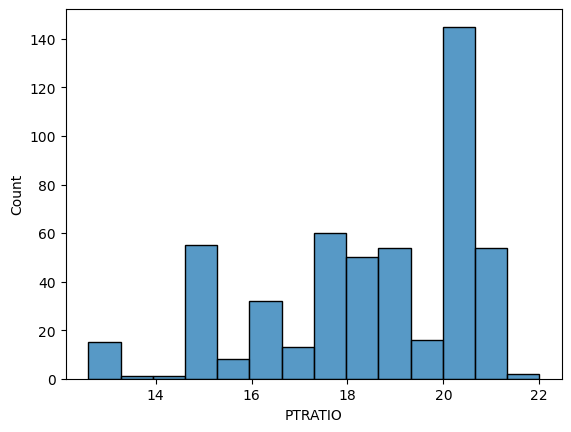

In [16]:
#Histogram Pupile to teacher ratio 
sns.histplot(data=boston_df, x="PTRATIO")


In [17]:
#T TEST MEDV by CHAS 
#H0: There is no difference between median value of houses bounded by the Charles river 
#HA: There is a significant difference between median value of houses bounded by the Charles river 
#alpha=0.05
from scipy.stats import ttest_ind


chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']


t_statistic, p_value = ttest_ind(chas_0, chas_1)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

#Since the p-value is lower than 0.05, we reject the null hypothesis. With 95% confidence, there is a statistically significant difference between 
#median value of houses bounded by the Charles river

T-statistic: -3.996437466090509
P-value: 7.390623170519905e-05


In [18]:
#ANOVA MEDV by AGE 

#H0: There is no significant difference between the median values for each proportion of owner occupied units prior to age 1940
#HA: At least one median values for each proportion of owner occupied units prior to age 1940 is significantly different
#alpha=0.05
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('MEDV ~ C(AGE)', data=boston_df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

#Since the p-value is much higher than the p-value, we fail to reject the null-hypothesis, meaning that there is no significant
# difference between median values of houses for each proportion of owner occupied units built prior to 1940


                sum_sq     df         F   PR(>F)
C(AGE)    29884.038419  355.0  0.984009  0.55397
Residual  12832.256996  150.0       NaN      NaN


In [22]:
#Correlation between Nitric oxide concentrations and proportion of non-retail business acres per town 

#H0: There is no correlationn between Nitric oxide concentrations and proportion of non-retail business acres per town
#HA: There is a significant correlationn between Nitric oxide concentrations and proportion of non-retail business acres per town
#alpha=0.05
from scipy.stats import pearsonr

correlation, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("r", correlation)
print("p-value:", p_value)

#Since the p-value is much lower than 0.05, we reject the null-hypothesis, meaning that there is a significant strong positive correlation between Nitric oxide 
#concentration andproportionof non-retailbusiness acres per town, from 0.76

r 0.7636514469209192
p-value: 7.913361061210442e-98


In [23]:
#Regression MEDV (dependent variable) and DIS (independent variable)

#H0: The distance to the five Boston employment centres does not explain the median value of owner occupied homes
#HA: The distance to the five Boston employment centres helps to explain the median value of owner occupied homes
#alpha=0.05
import statsmodels.api as sm

X = sm.add_constant(boston_df['DIS']) 

y = boston_df['MEDV']

model = sm.OLS(y, X).fit()

print(model.summary())
#Since the p-values from the coeficients are lower than 0.05, we reject the null hypothesis, meaning that the distance to the five Boston employment 
#helps to understand the median value of owner occupied homes. Although the model is significant, the adjusted R-squared indicates that only 6% of the 
#variance from the MEDV is explained in the model. 

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 11 May 2024   Prob (F-statistic):           1.21e-08
Time:                        21:15:47   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0